Sejal Sanas

# Image Recognition with CNN

This notebook trains a Convolutional Neural Network (CNN) on the CIFAR-10 dataset for image recognition.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3316 - loss: 1.8016 - val_accuracy: 0.5390 - val_loss: 1.2836
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5548 - loss: 1.2428 - val_accuracy: 0.5888 - val_loss: 1.1594
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6236 - loss: 1.0616 - val_accuracy: 0.6435 - val_loss: 1.0111
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6598 - loss: 0.9589 - val_accuracy: 0.6470 - val_loss: 1.0032
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6918 - loss: 0.8774 - val_accuracy: 0.6862 - val_loss: 0.8975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7156 - loss: 0.8075 - val_accuracy: 0.6934 - val_loss: 0.8928
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7337 - loss: 0.7635 - val_accuracy: 0.6935 - val_loss: 0.8812
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7499 -

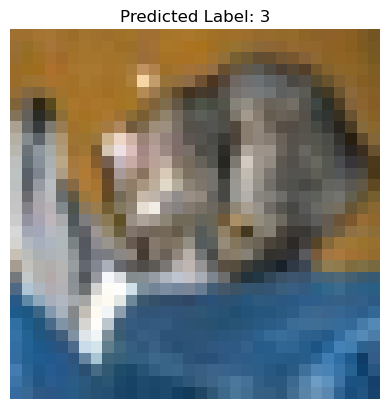

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


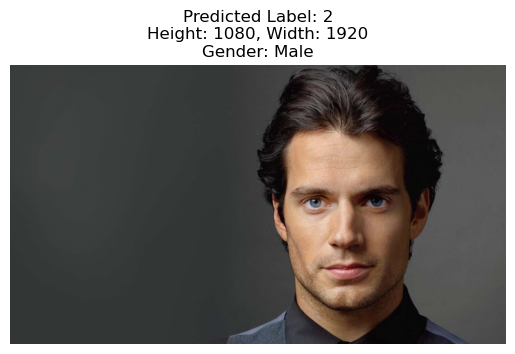

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


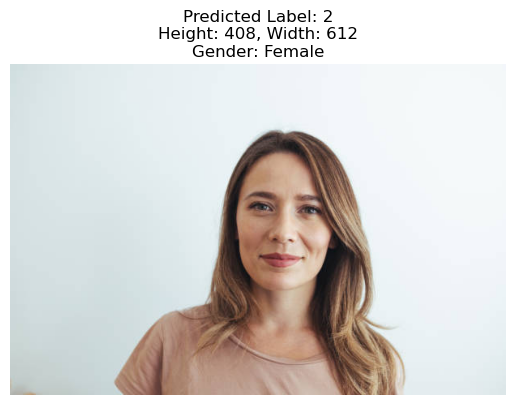

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
from tensorflow.keras.preprocessing import image

# Load dataset (CIFAR-10, which contains 60,000 images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Function to predict and display image
def predict_image(index):
    plt.imshow(x_test[index])
    plt.axis('off')
    prediction = model.predict(np.expand_dims(x_test[index], axis=0))
    predicted_label = np.argmax(prediction)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def classify_gender(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) == 0:
        return "Unknown"
    
    x, y, w, h = faces[0]  # Take the first detected face
    face_region = gray[y:y+h, x:x+w]
    avg_intensity = np.mean(face_region)
    
    if avg_intensity > 120:
        return "Female"
    else:
        return "Male"

# Function to classify multiple images
def classify_custom_images(image_paths):
    for image_path in image_paths:
        img = cv2.imread(image_path)
        height, width, _ = img.shape  # Get image dimensions
        img_resized = cv2.resize(img, (32, 32))  # Resize to match model input
        img_resized = img_resized / 255.0  # Normalize pixel values
        img_resized = np.expand_dims(img_resized, axis=0)  # Expand dimensions
        
        # Make a prediction
        prediction = model.predict(img_resized)
        predicted_label = np.argmax(prediction)
        
        # Predict gender
        gender = classify_gender(image_path)
        
        # Display the image with predicted label, image info, and gender
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predicted Label: {predicted_label}\nHeight: {height}, Width: {width}\nGender: {gender}')
        plt.show()

# Predict an example image
predict_image(0)

# Classify multiple images
image_paths = [
    r"C:/Users/Shejal Sanas/Desktop/Internship/man-face-british-actor-henry-cavill-cn0szkq9wu85sq96.jpg",
    r"C:/Users/Shejal Sanas/Desktop/Internship/istockphoto-1425797951-612x612.jpg"
]
classify_custom_images(image_paths)